In [17]:
# Barrier impedance statistics for a biophysically realistic trigeminal nerve "depths model"
# Investigating if there is an effect increasing stratum corneum thickness and impedance with regards to the activating function for a deep nerve and for that of a nociceptor

# KDK February, 2025
# WITNe, University of Wisconsin-Madison

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os
print('read in libs')

read in libs


In [19]:
# EDIT ME -----------------------------------------------------------------------------------------------------
file = # LOCATION OF "COMSOL OUTPUT XLSX FILE"
# EDIT ME -----------------------------------------------------------------------------------------------------

# read 
contact_impedance = pd.read_excel(file, sheet_name='Read In Contact Impedance',skiprows=1)
contact_thickness = pd.read_excel(file, sheet_name='Read In Contact Thickness',skiprows=1)

# datatype error handling
columns_to_convert = contact_thickness.columns.difference(['Branch'])
contact_thickness[columns_to_convert] = contact_thickness[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# set cutaneous branch for trigeminal nerve division
def determine_value(col_value):
  if col_value in ['V1']:
    return 'SON'
  elif col_value in ['V2']:
    return 'ION'
  elif col_value in ['V3']:
    return 'MN'
  else:
    return 'Other'

contact_impedance['Nerve'] = contact_impedance['Branch'].apply(determine_value)
contact_thickness['Nerve'] = contact_thickness['Branch'].apply(determine_value)

contact_impedance
contact_thickness

,Branch,Barrier Distance (um),Nociceptor AF (V/m^2),Nerve AF (V/m^2),Ratio Nociceptor / Nerve,Nerve
0,V1,10,83736000,768.370,108978.747218,SON
1,V1,15,81053000,761.200,106480.557015,SON
2,V1,20,78480000,754.470,104020.040558,SON
3,V1,25,76059000,748.050,101676.358532,SON
4,V1,30,73900000,741.880,99611.797056,SON
5,V2,10,78739000,130.520,603271.529268,ION
6,V2,15,76261000,129.380,589434.224764,ION
7,V2,20,73882000,128.300,575853.468433,ION
8,V2,25,71642000,127.270,562913.491003,ION
9,V2,30,69583000,126.290,550977.907990,ION


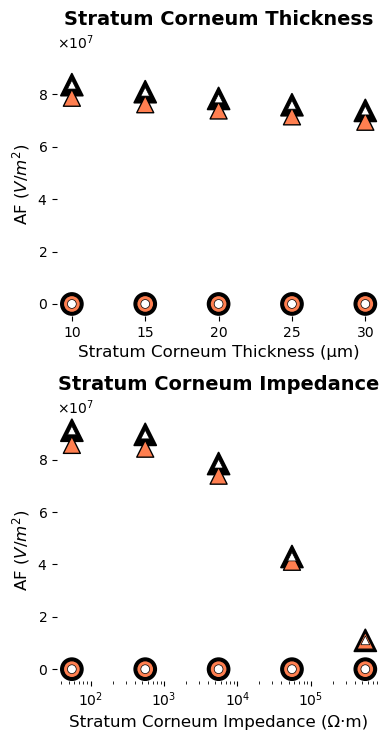

In [21]:
# Plotting Activation Functions

# formatting
nociceptor_marker = "^"
nerve_marker = "o"

# Parameters
jitter_strength = 0.00  # Adjust x-axis jitter
size_values = {"MN": 40, "ION": 150, "SON": 250}  # Fixed sizes: MN (smallest), ION (medium), SON (largest)

# Ensure Nerve column is categorical
contact_thickness["Nerve"] = contact_thickness["Nerve"].astype("category")
contact_impedance["Nerve"] = contact_impedance["Nerve"].astype("category")

fig, axs = plt.subplots(2, 1, figsize=(4, 7.5), sharey=True)
nerves = ["SON", "ION", "MN"]
nerve_colors = {"SON": 'black', "ION": 'coral', "MN": 'white'}

# Formatter for scientific notation
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))

for nerve in nerves:
    # Filter data
    df_contact = contact_thickness[contact_thickness["Nerve"] == nerve].copy()
    df_impedance = contact_impedance[contact_impedance["Nerve"] == nerve].copy()

    # Apply jitter to x-values
    df_contact["Jittered Barrier Distance"] = df_contact["Barrier Distance (um)"] + np.random.uniform(-jitter_strength, jitter_strength, len(df_contact))
    df_impedance["Jittered Impedance"] = 1 / df_impedance["Contact Conductance (S/m)"] * (1 + np.random.uniform(-jitter_strength, jitter_strength, len(df_impedance)))

    # Assign fixed marker sizes
    df_contact["Marker Size"] = size_values[nerve]
    df_impedance["Marker Size"] = size_values[nerve]

    # Plot Barrier Thickness (left subplot)
    sns.scatterplot(x="Jittered Barrier Distance", y="Nociceptor AF (V/m^2)", data=df_contact,
                    ax=axs[0], label=f"{nerve} - Nociceptor", marker=nociceptor_marker,
                    s=df_contact["Marker Size"], edgecolor='black', color=nerve_colors[nerve])

    sns.scatterplot(x="Jittered Barrier Distance", y="Nerve AF (V/m^2)", data=df_contact,
                    ax=axs[0], label=f"{nerve} - Nerve", marker=nerve_marker,
                    s=df_contact["Marker Size"], edgecolor='black', color=nerve_colors[nerve])

    # Plot Barrier Impedance (right subplot)
    sns.scatterplot(x="Jittered Impedance", y="Nociceptor AF (V/m^2)", data=df_impedance,
                    ax=axs[1], label=f"{nerve} - Nociceptor", marker=nociceptor_marker,
                    s=df_impedance["Marker Size"], edgecolor='black', color=nerve_colors[nerve])
    
    sns.scatterplot(x="Jittered Impedance", y="Nerve AF (V/m^2)", data=df_impedance,
                    ax=axs[1], label=f"{nerve} - Nerve", marker=nerve_marker,
                    s=df_impedance["Marker Size"], edgecolor='black', color=nerve_colors[nerve])


# plot
axs[0].set_title("Stratum Corneum Thickness", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Stratum Corneum Thickness (μm)", fontsize=12)
axs[0].set_ylabel(r"AF ($V/m^2$)", fontsize=12)
# axs[0].grid(True)
axs[0].set_xscale("linear")
axs[0].yaxis.set_major_formatter(formatter)
# axs[0].legend(loc='center right', bbox_to_anchor=(0.98, 0.45), borderaxespad=0.)
axs[0].legend().set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

axs[1].set_title("Stratum Corneum Impedance", fontsize=14, fontweight="bold")
axs[1].set_xlabel("Stratum Corneum Impedance (Ω·m)", fontsize=12)
# axs[1].grid(True)
axs[1].set_xscale("log")
axs[1].set_ylabel(r"AF ($V/m^2$)", fontsize=12)
axs[1].yaxis.set_major_formatter(formatter)
# axs[1].legend(loc='center right', bbox_to_anchor=(0.98, 0.45), borderaxespad=0.)
axs[1].legend().set_visible(False)
axs[0].legend().set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)

plt.tight_layout()

# EDIT ME -----------------------------------------------------------------------------------------------------
# downloads_path = os.path.join(os.path.expanduser("~"), r" INSERT FILE PATH HERE ", "stratum_corneum_plot.png")
# EDIT ME -----------------------------------------------------------------------------------------------------

plt.savefig(downloads_path, dpi=600, bbox_inches='tight')

plt.show()

In [ ]:
# Plotting Zoomed Activation Functions

# formatting
nociceptor_marker = "X"
nerve_marker = "o"

# Parameters
jitter_strength = 0.00  # Adjust x-axis jitter
size_values = {"MN": 40, "ION": 150, "SON": 250}  # Fixed sizes: MN (smallest), ION (medium), SON (largest)

# Ensure Nerve column is categorical
contact_thickness["Nerve"] = contact_thickness["Nerve"].astype("category")
contact_impedance["Nerve"] = contact_impedance["Nerve"].astype("category")

fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharey=True)

nerves = ["SON", "ION", "MN"]
nerve_colors = {"SON": 'black', "ION": 'coral', "MN": 'white'}

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))

for nerve in nerves:
    # Filter data
    df_contact = contact_thickness[contact_thickness["Nerve"] == nerve].copy()
    df_impedance = contact_impedance[contact_impedance["Nerve"] == nerve].copy()

    # Apply jitter to x-values
    df_contact["Jittered Barrier Distance"] = df_contact["Barrier Distance (um)"] + np.random.uniform(-jitter_strength, jitter_strength, len(df_contact))
    df_impedance["Jittered Impedance"] = 1 / df_impedance["Contact Conductance (S/m)"] * (1 + np.random.uniform(-jitter_strength, jitter_strength, len(df_impedance)))

    # Assign fixed marker sizes
    df_contact["Marker Size"] = size_values[nerve]
    df_impedance["Marker Size"] = size_values[nerve]

    # Plot Barrier Thickness (left subplot)
    sns.scatterplot(x="Jittered Barrier Distance", y="Nerve AF (V/m^2)", data=df_contact,
                    ax=axs[0], label=f"{nerve} - Nerve", marker=nerve_marker,
                    s=df_contact["Marker Size"], edgecolor='black', color=nerve_colors[nerve])

    # Plot Barrier Conductance (right subplot)
    sns.scatterplot(x="Jittered Impedance", y="Nerve AF (V/m^2)", data=df_impedance,
                    ax=axs[1], label=f"{nerve} - Nerve", marker=nerve_marker,
                    s=df_impedance["Marker Size"], edgecolor='black', color=nerve_colors[nerve])

# Set titles and labels
# axs[0].set_title("Barrier Thickness", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Stratum Corneum Thickness (μm)", fontsize=12)
axs[0].set_ylabel(r"AF ($V/m^2$)", fontsize=12)
# axs[0].grid(True)
axs[0].set_xscale("linear")
axs[0].yaxis.set_major_formatter(formatter)
# axs[0].legend(loc='center right', bbox_to_anchor=(0.98, 0.55), borderaxespad=0.)
axs[0].legend().set_visible(False)
axs[0].set_ylim(-50,1000)


# axs[1].set_title("Barrier Conductance", fontsize=14, fontweight="bold")
axs[1].set_xlabel("Stratum Corneum Impedance (Ω-m)", fontsize=12)
# axs[1].grid(True)
axs[1].set_xscale("log")
axs[1].set_ylabel(r"AF ($V/m^2$)", fontsize=12)
axs[1].yaxis.set_major_formatter(formatter)
# axs[1].legend(loc='center right', bbox_to_anchor=(0.98, 0.55), borderaxespad=0.)
axs[1].legend().set_visible(False)
axs[1].set_ylim(-50,1000)

plt.tight_layout()

# EDIT ME -----------------------------------------------------------------------------------------------------
# downloads_path = os.path.join(os.path.expanduser("~"), r" FILE PATH HERE ", "stratum_corneum_plot_zoomed.png")
plt.savefig(downloads_path, dpi=600, bbox_inches='tight')
# EDIT ME -----------------------------------------------------------------------------------------------------

plt.show()